# Decision Trees for Regression

In [1]:
# basics
import numpy as np
import matplotlib.pyplot as plt

# machine learning
from sklearn.datasets import make_friedman1
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

## Simulated Sine Wave Data

In [2]:
# simulate sine wave data with numpy
np.random.seed(42)
n = 200
X = np.random.uniform(low=-2 * np.pi, high=2 * np.pi, size=(n, 1))
y = np.sin(X) + np.random.normal(loc=0, scale=0.25, size=(n, 1))

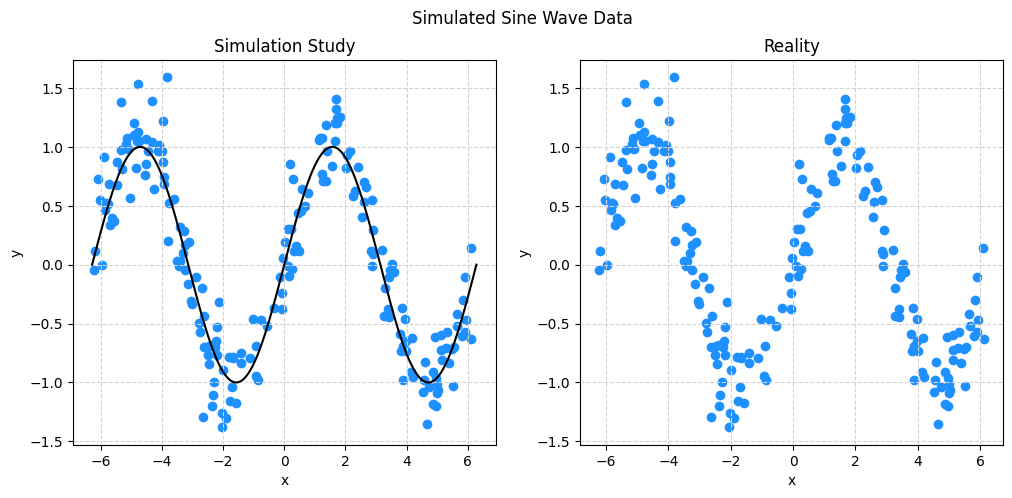

In [3]:
# setup figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.set_dpi(100)

# add overall title
fig.suptitle("Simulated Sine Wave Data")

# x values to make predictions at for plotting purposes
x_plot = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape((1000, 1))

# create subplot for "simulation study"
ax1.set_title("Simulation Study")
ax1.scatter(X, y, color="dodgerblue")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True, linestyle="--", color="lightgrey")
# add true regression function, the "signal" that we want to learn
ax1.plot(x_plot, np.sin(x_plot), color="black")

# create subplot for "reality"
ax2.set_title("Reality")
ax2.scatter(X, y, color="dodgerblue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True, linestyle="--", color="lightgrey")

# show plot
plt.show()

In [4]:
# fit a knn model for comparison
knn010 = KNeighborsRegressor(n_neighbors=10)
_ = knn010.fit(X, y)

In [5]:
# list the possible inputs (and their default values) to the DecisionTreeRegressor
DecisionTreeRegressor().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [6]:
# fit a decision tree with min_samples_split=40
dt040 = DecisionTreeRegressor(min_samples_split=40)
_ = dt040.fit(X, y)

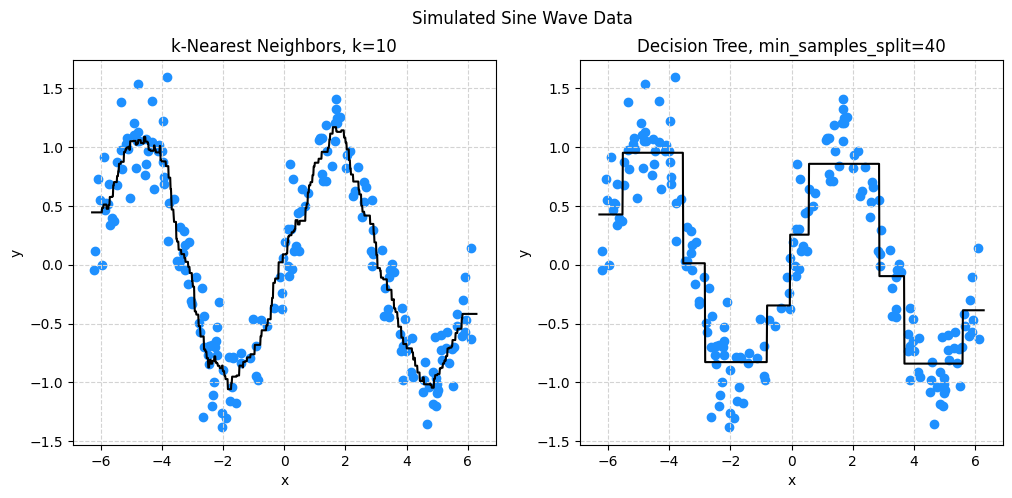

In [7]:
# setup figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
fig.set_dpi(100)

# add overall title
fig.suptitle("Simulated Sine Wave Data")

# x values to make predictions at for plotting purposes
x_plot = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape((1000, 1))

# create subplot for KNN
ax1.set_title("k-Nearest Neighbors, k=10")
ax1.scatter(X, y, color="dodgerblue")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True, linestyle="--", color="lightgrey")
ax1.plot(x_plot, knn010.predict(x_plot), color="black")

# create subplot for decision tree
ax2.set_title("Decision Tree, min_samples_split=40")
ax2.scatter(X, y, color="dodgerblue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True, linestyle="--", color="lightgrey")
ax2.plot(x_plot, dt040.predict(x_plot), color="black")

# show plot
plt.show()

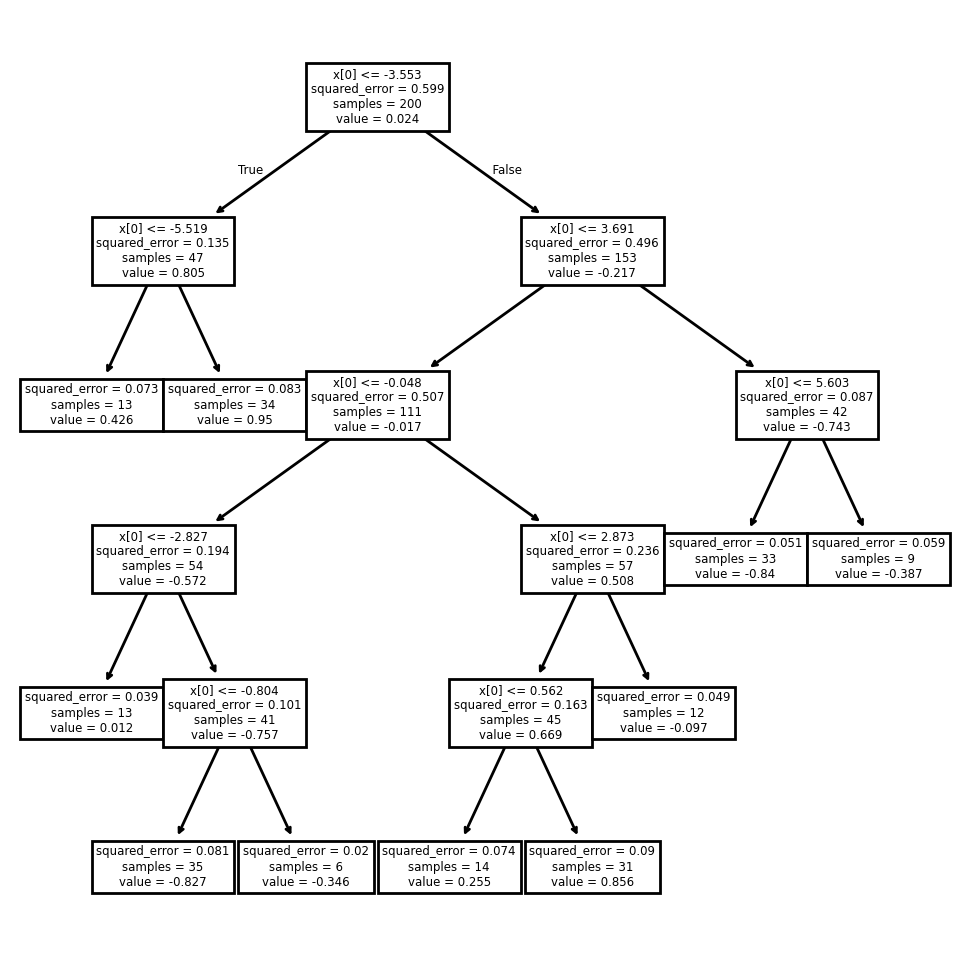

In [8]:
# visualize the decision tree
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
fig.set_dpi(200)
plot_tree(dt040)
plt.show()

In [9]:
# view text representation of the tree
print(export_text(dt040))

|--- feature_0 <= -3.55
|   |--- feature_0 <= -5.52
|   |   |--- value: [0.43]
|   |--- feature_0 >  -5.52
|   |   |--- value: [0.95]
|--- feature_0 >  -3.55
|   |--- feature_0 <= 3.69
|   |   |--- feature_0 <= -0.05
|   |   |   |--- feature_0 <= -2.83
|   |   |   |   |--- value: [0.01]
|   |   |   |--- feature_0 >  -2.83
|   |   |   |   |--- feature_0 <= -0.80
|   |   |   |   |   |--- value: [-0.83]
|   |   |   |   |--- feature_0 >  -0.80
|   |   |   |   |   |--- value: [-0.35]
|   |   |--- feature_0 >  -0.05
|   |   |   |--- feature_0 <= 2.87
|   |   |   |   |--- feature_0 <= 0.56
|   |   |   |   |   |--- value: [0.25]
|   |   |   |   |--- feature_0 >  0.56
|   |   |   |   |   |--- value: [0.86]
|   |   |   |--- feature_0 >  2.87
|   |   |   |   |--- value: [-0.10]
|   |--- feature_0 >  3.69
|   |   |--- feature_0 <= 5.60
|   |   |   |--- value: [-0.84]
|   |   |--- feature_0 >  5.60
|   |   |   |--- value: [-0.39]



In [10]:
# initialize decision trees with different values of the tuning parameter min_samples_split
dt002 = DecisionTreeRegressor(min_samples_split=2)
dt100 = DecisionTreeRegressor(min_samples_split=100)
dt250 = DecisionTreeRegressor(min_samples_split=250)

In [11]:
# fit those models
_ = dt002.fit(X, y)
_ = dt100.fit(X, y)
_ = dt250.fit(X, y)

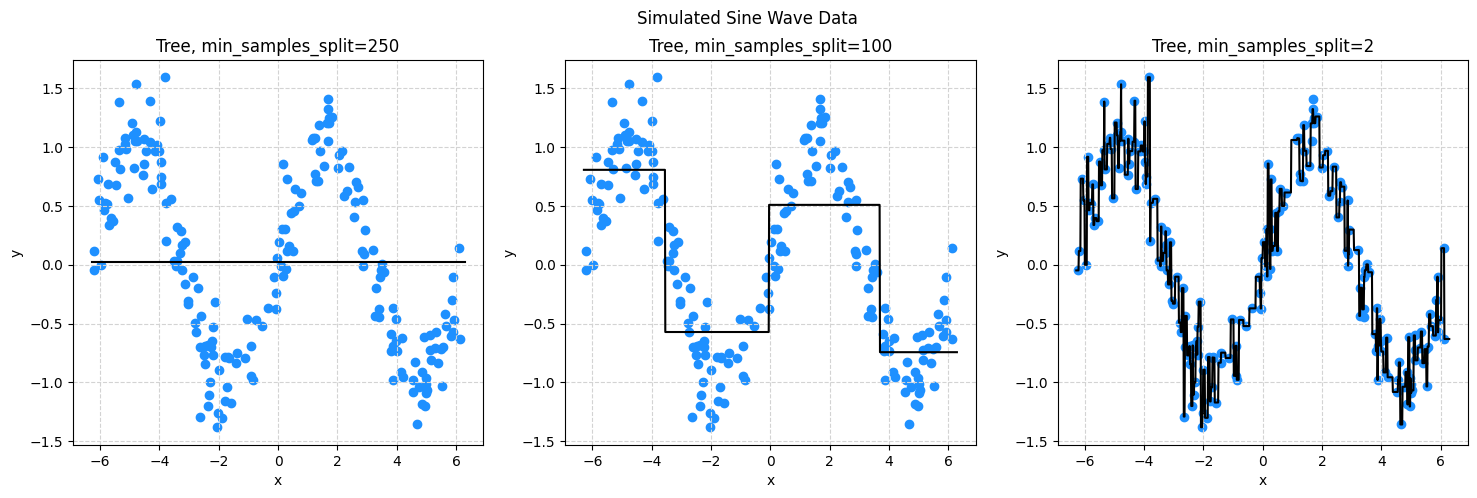

In [12]:
# setup figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)
fig.set_dpi(100)

# add overall title
fig.suptitle("Simulated Sine Wave Data")

# x values to make predictions at for plotting purposes
x_plot = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape((1000, 1))

# create subplot for decision tree with min_samples_split=250
ax1.set_title("Tree, min_samples_split=250")
ax1.scatter(X, y, color="dodgerblue")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True, linestyle="--", color="lightgrey")
ax1.plot(x_plot, dt250.predict(x_plot), color="black")

# create subplot for decision tree with min_samples_split=100
ax2.set_title("Tree, min_samples_split=100")
ax2.scatter(X, y, color="dodgerblue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True, linestyle="--", color="lightgrey")
ax2.plot(x_plot, dt100.predict(x_plot), color="black")

# create subplot for decision tree with min_samples_split=2
ax3.set_title("Tree, min_samples_split=2")
ax3.scatter(X, y, color="dodgerblue")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.grid(True, linestyle="--", color="lightgrey")
ax3.plot(x_plot, dt002.predict(x_plot), color="black")

# show plot
plt.show()

In [13]:
# initialize decision trees with different values of the tuning parameter max_depth
dt_d01 = DecisionTreeRegressor(max_depth=1)
dt_d05 = DecisionTreeRegressor(max_depth=5)
dt_d10 = DecisionTreeRegressor(max_depth=10)

In [14]:
# fit those models
_ = dt_d01.fit(X, y)
_ = dt_d05.fit(X, y)
_ = dt_d10.fit(X, y)

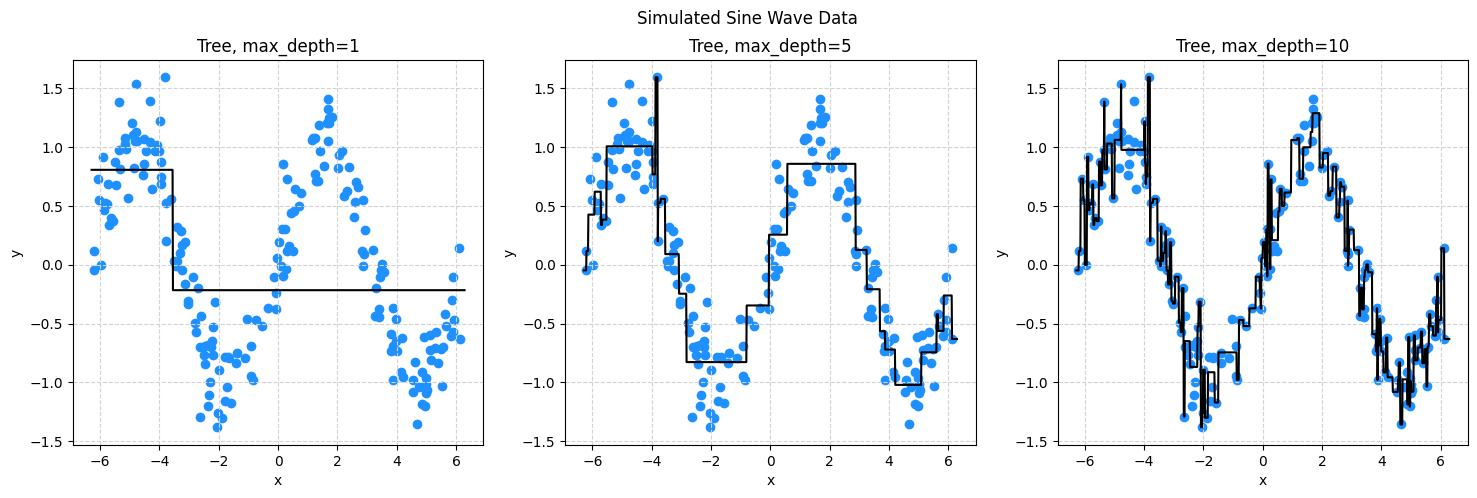

In [15]:
# setup figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)
fig.set_dpi(100)

# add overall title
fig.suptitle("Simulated Sine Wave Data")

# x values to make predictions at for plotting purposes
x_plot = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape((1000, 1))

# create subplot for decision tree with max_depth=1
ax1.set_title("Tree, max_depth=1")
ax1.scatter(X, y, color="dodgerblue")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True, linestyle="--", color="lightgrey")
ax1.plot(x_plot, dt_d01.predict(x_plot), color="black")

# create subplot for decision tree with max_depth=5
ax2.set_title("Tree, max_depth=5")
ax2.scatter(X, y, color="dodgerblue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid(True, linestyle="--", color="lightgrey")
ax2.plot(x_plot, dt_d05.predict(x_plot), color="black")

# create subplot for decision tree with max_depth=10
ax3.set_title("Tree, max_depth=10")
ax3.scatter(X, y, color="dodgerblue")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.grid(True, linestyle="--", color="lightgrey")
ax3.plot(x_plot, dt_d10.predict(x_plot), color="black")

# show plot
plt.show()

## Simulate Data with Multiple Features

In [16]:
# simulate and inspect data
X_train, y_train = make_friedman1(n_samples=200, n_features=5, random_state=42)
X_test, y_test = make_friedman1(n_samples=200, n_features=5, random_state=1)
X_train[:10]

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998],
       [0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203],
       [0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998],
       [0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446]])

In [17]:
# initialize, fit, and evaluate a decision tree
dt = DecisionTreeRegressor(min_samples_split=50)
_ = dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(root_mean_squared_error(y_test, dt_pred))

3.0156480081689834


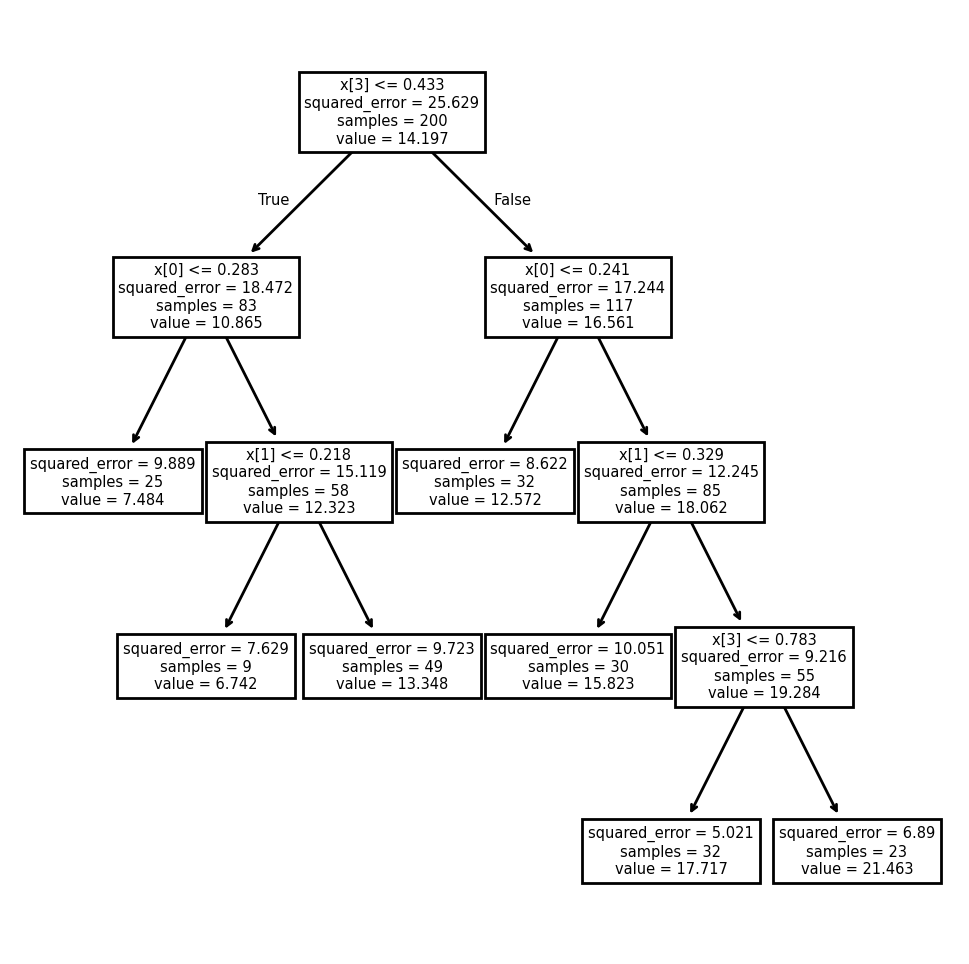

In [18]:
# visualize the decision tree
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
fig.set_dpi(200)
plot_tree(dt)
plt.show()

In [19]:
# view text representation of the tree
print(export_text(dt))

|--- feature_3 <= 0.43
|   |--- feature_0 <= 0.28
|   |   |--- value: [7.48]
|   |--- feature_0 >  0.28
|   |   |--- feature_1 <= 0.22
|   |   |   |--- value: [6.74]
|   |   |--- feature_1 >  0.22
|   |   |   |--- value: [13.35]
|--- feature_3 >  0.43
|   |--- feature_0 <= 0.24
|   |   |--- value: [12.57]
|   |--- feature_0 >  0.24
|   |   |--- feature_1 <= 0.33
|   |   |   |--- value: [15.82]
|   |   |--- feature_1 >  0.33
|   |   |   |--- feature_3 <= 0.78
|   |   |   |   |--- value: [17.72]
|   |   |   |--- feature_3 >  0.78
|   |   |   |   |--- value: [21.46]

